In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#importing datasets
train=pd.read_csv("titanic_train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#calculating length of data
len(train)

891

In [5]:
#checking survival on basis of sex
sex=train.groupby('Sex')['Survived'].agg('sum').reset_index()
sex

,Sex,Survived
0,female,233
1,male,109


In [6]:
#survival on the basis of pclass
Class=train.groupby('Pclass')['Survived'].agg('sum').reset_index()

In [7]:
Class

,Pclass,Survived
0,1,136
1,2,87
2,3,119


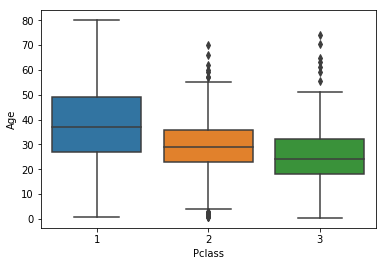

In [8]:
#boxploting for checking outliers 
sns.boxplot(x='Pclass',y='Age',data=train)

In [9]:
####calculation of median of pclass
age1=train.groupby('Pclass')['Age'].agg('median').reset_index()
age1


,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [10]:
#doing substituting process in null values for age
def change_age(cols):
    Age=cols[0]
    Pclass=cols[1]
   
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 24
    else:
        return Age
train['Age']=train[['Age','Pclass']].apply(change_age, axis=1)
#doing substituting process in null values for embarked
def change_emrk(cols):
    Embarked=cols[0]
    C='S'
    if pd.isnull(Embarked):
        return C
    else:
        return Embarked
train['Embarked']=train[['Embarked']].apply(change_emrk, axis=1)
#checking info again for verification
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
#keeping only required columns in train
train=train[['Survived','Pclass','Sex','SibSp','Age','Parch','Embarked']]
len(train)

891

In [12]:
#assigning X and y::x->train[1:6]and y->train[0]
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [13]:
#encoding and fitting
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_y=LabelEncoder()
labelencoder_X=LabelEncoder()
#handling categorical data
#label encoding for columns contain strings
X[:,-1]=labelencoder_X.fit_transform(X[:,-1].astype(str))
X[:,1]=labelencoder_X.fit_transform(X[:,1])

#doing one hot encoding for categorical data  columns
onehotencoder_X=OneHotEncoder(categorical_features=[[0,1,5]])
X=onehotencoder_X.fit_transform(X).toarray()
y=labelencoder_y.fit_transform(y)


In [14]:
#KNN algorithm
k=range(0,2900)
lst=[]
for j in k:
    #splitting data (train->75%,test->25%)
    from sklearn.cross_validation import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=j)
    #applying algorithm
    from sklearn.neighbors import KNeighborsClassifier
    Knn=KNeighborsClassifier(n_neighbors=300)
    Knn.fit(X_train,y_train)
    y_pred3=Knn.predict(X_test)
    #calculating score
    from sklearn.metrics import accuracy_score
    lst.append(accuracy_score(y_test,y_pred3))
print(max(lst),j)

/root/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.8340807174887892 2899


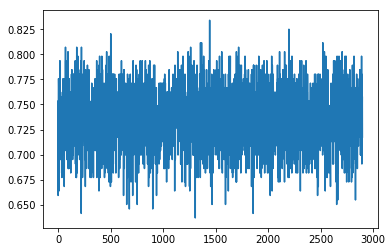

In [15]:
#graph ploting
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k,lst)

In [16]:
#Decision tree
i=range(1000,3000)
lst=[]
for j in i:
     #splitting data (train->75%,test->25%)
    from sklearn.cross_validation import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=j)
    #applying algorithm
    from sklearn.tree import DecisionTreeClassifier
    clf1=DecisionTreeClassifier(min_impurity_decrease=0.1)
    clf1.fit(X_train,y_train)
    y_pred1=clf1.predict(X_test)
    y_test
    #calculating score
    from sklearn.metrics import accuracy_score
    lst.append(accuracy_score(y_test,y_pred1))
print(max(lst),j)

0.874439461883408 2999


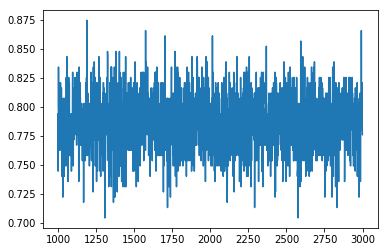

In [17]:
#graph ploting
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(i,lst)

In [18]:
#logistic regression
l=range(1000)
lst=[]
for j in l:
    #splitting data (train->75%,test->25%)
    from sklearn.cross_validation import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=j)
    #applying algorithm
    from sklearn.linear_model import LogisticRegression
    clf2=LogisticRegression()
    clf2.fit(X_train,y_train)
    y_pred2=clf2.predict(X_test)
    #calculating score
    from sklearn.metrics import accuracy_score
    lst.append(accuracy_score(y_test,y_pred2))
print('accuracy',round(max(lst),4)*100,j)

accuracy 89.24 999


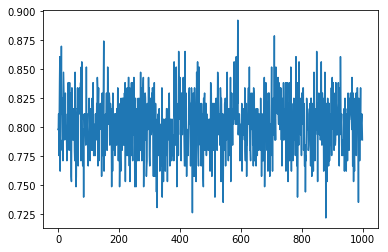

In [19]:
#graph ploting
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(l,lst)

In [22]:
#random forest
r=range(200,300)
lst=[]
for j in r:
    #splitting data (train->75%,test->25%)
    from sklearn.cross_validation import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=j)
    #applying algorithm
    from sklearn.ensemble import RandomForestClassifier
    clf=RandomForestClassifier(n_estimators=300)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #calculating score
    from sklearn.metrics import accuracy_score
    lst.append(accuracy_score(y_test,y_pred))
print(max(lst),j)

0.8565022421524664 299


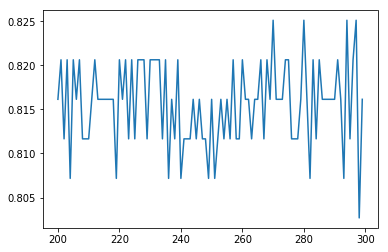

In [21]:
#graph ploting
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(r,lst)